# Modelos de Regresión Lineal
## Modelos con datos simulados

#### y=a+b*x
#### X = 100 valores distribuidos segun una N(1.5 , 2.5)
#### Ye = 5 + 1.9 * x + u
#### e = estara distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame({
    "x":x_list,
    "y_actual":y_act_list,
    "y_prediccion":y_pred_list
})

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.844901,5.821375,6.605312
1,3.231015,11.383122,11.138929
2,-2.675703,-1.612128,-0.083837
3,0.059739,5.498625,5.113505
4,-1.083045,1.584490,2.942215


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act)for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

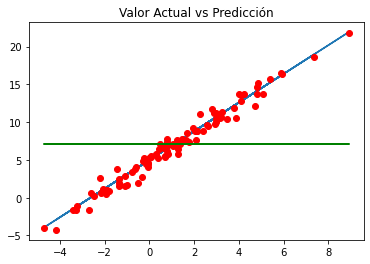

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [12]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.844901,5.821375,6.605312,0.232022,0.614558,1.601805
1,3.231015,11.383122,11.138929,16.418140,0.059630,18.456676
2,-2.675703,-1.612128,-0.083837,51.420881,2.335675,75.674810
3,0.059739,5.498625,5.113505,3.894678,0.148317,2.522933
4,-1.083045,1.584490,2.942215,17.179236,1.843416,30.277601


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

2335.6876403433075

In [16]:
SSD

63.314979281340676

In [17]:
SST

2469.869816458352

In [18]:
SSR + SSD

2399.002619624648

In [19]:
R2 = SSR/SST

In [20]:
R2

0.9456723689560877

(array([ 4.,  3.,  8., 16., 19., 26., 12.,  3.,  7.,  2.]),
 array([-1.79540523, -1.40060136, -1.00579749, -0.61099362, -0.21618975,
         0.17861413,  0.573418  ,  0.96822187,  1.36302574,  1.75782962,
         2.15263349]),
 <a list of 10 Patch objects>)

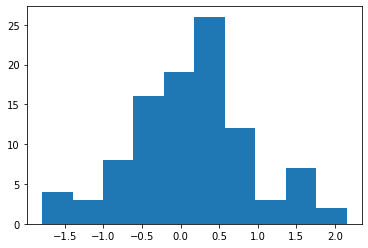

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m)*(y_i-u_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean , y_mean

(1.1762413784798442, 7.08699892303781)

In [23]:
data["beta_m"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_m"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.816110738870683, 1.930631098101639)

El modelo lineal obtenido por regresión es: y = 4.969789315782365 + 1.9152109358670348 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_m,beta_d,y_model
0,0.844901,5.821375,6.605312,0.232022,0.614558,1.601805,0.419352,0.109786,6.447303
1,3.231015,11.383122,11.138929,16.418140,0.059630,18.456676,8.827563,4.222096,11.054010
2,-2.675703,-1.612128,-0.083837,51.420881,2.335675,75.674810,33.508557,14.837479,-0.349686
3,0.059739,5.498625,5.113505,3.894678,0.148317,2.522933,1.773423,1.246577,4.931446
4,-1.083045,1.584490,2.942215,17.179236,1.843416,30.277601,12.431742,5.104374,2.725151


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(2409.3475794313913, 60.52223702695747, 2469.869816458352)

In [31]:
R2 = SSR / SST
R2

0.9754957785128343

Text(0.5, 1.0, 'Valor Actual vs Predicción')

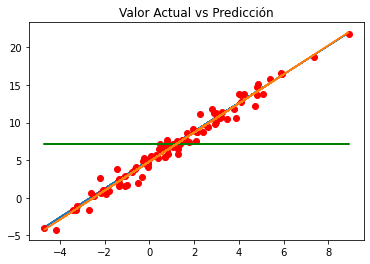

In [32]:
y_mean = [np.mean(y_act)for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"],"ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [34]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7858586687273048

In [35]:
np.mean(data["y_actual"])

7.08699892303781

In [36]:
RSE / np.mean(data["y_actual"])

0.11088736957087755